In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [2]:
df = pd.read_csv("mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.shape

(8124, 23)

In [7]:
print("There are {:,} rows ".format(df.shape[0]) + "and {} columns in our data".format(df.shape[1]))

There are 8,124 rows and 23 columns in our data


In [8]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [9]:
df["class"].unique()

array(['p', 'e'], dtype=object)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


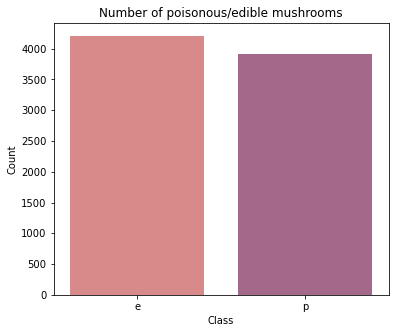

In [10]:
count = df['class'].value_counts()
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.8, palette="flare")
plt.ylabel('Count', fontsize=10)
plt.xlabel('Class', fontsize=10)
plt.title('Number of poisonous/edible mushrooms')
plt.show()

From above we can say the data is balanced

Now, as we know the data is categorical so we wil use LabelEncoder to convert it to ordinal.

In [11]:
df = df.astype('category')

In [12]:
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [13]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [14]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Now the data with no contribution or not required we can remove it.

In [15]:
df['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [16]:
df = df.drop(['veil-type'],axis=1)

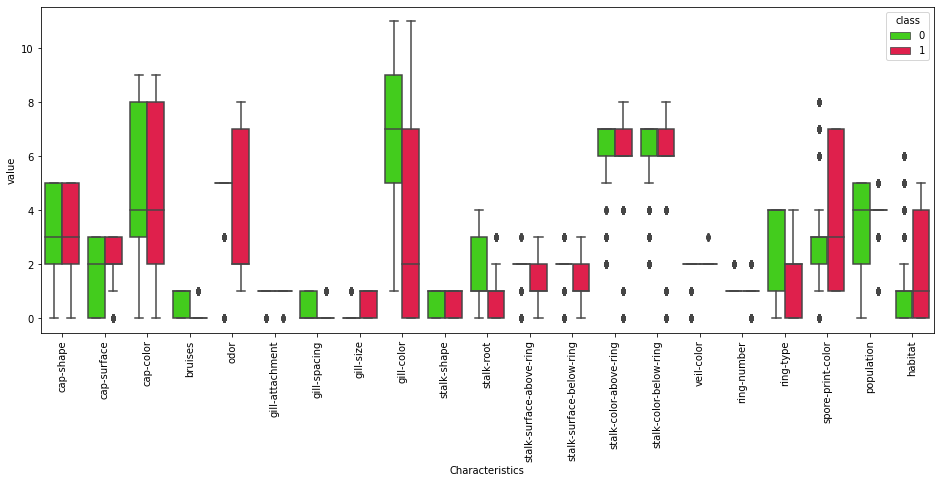

In [17]:
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(16,6))
ax = sns.boxplot(x="Characteristics", y="value", hue="class",

                 data = df_div, palette="prism")
df_no_class = df.drop(["class"],axis = 1)
ax.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

The box plot above represents the distribution of the classification characteristics. It is possible to see that the "gill colour" property of the mushroom property in two boxes, one is great above 3 and other is great below 3 that may contribute to the classification.

Now we will find the correlations between the variables.

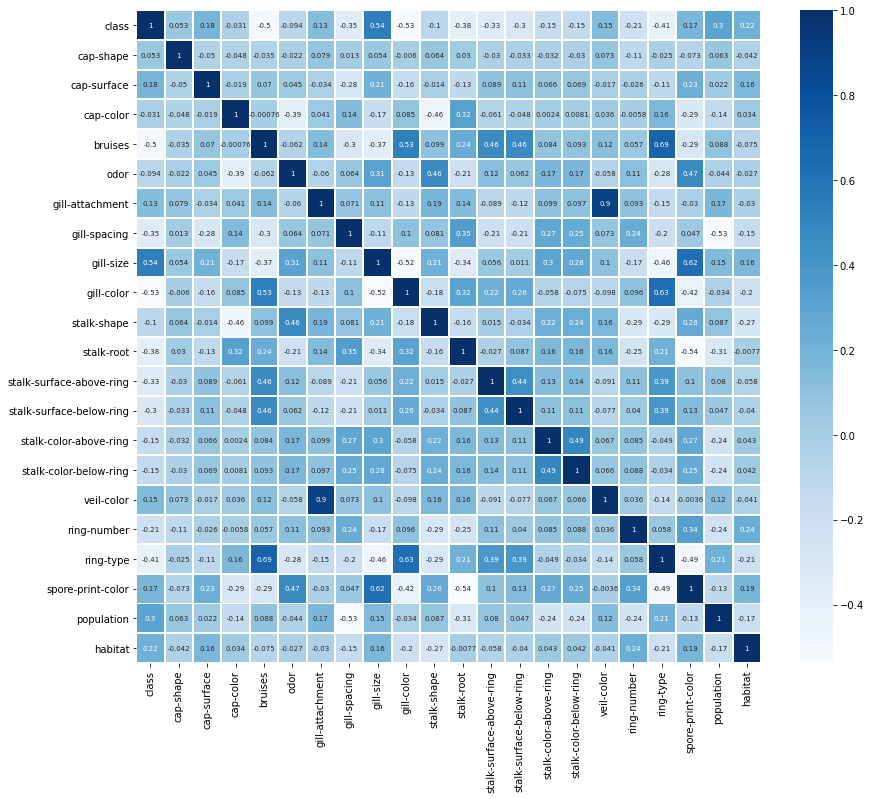

In [18]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidth=1 , cmap = "Blues", annot = True, annot_kws={"size": 7})
plt.yticks(rotation = 0);

The least correlating variable is theimportant one for classification and in our case the "gill-color" has -0.53.

In [19]:
df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class',ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


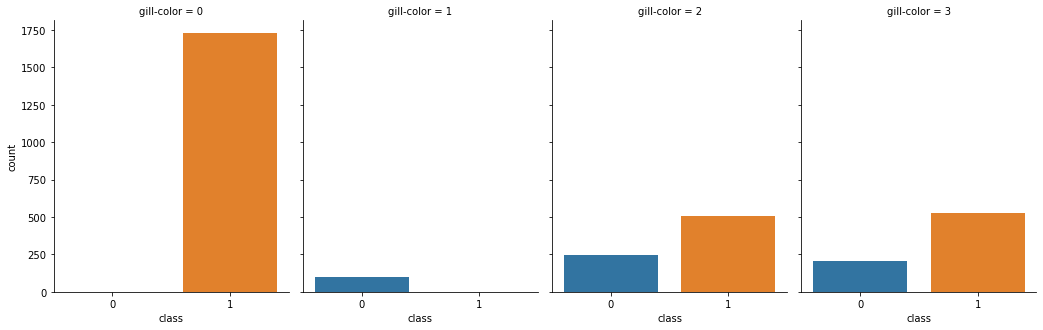

In [20]:
new_var = df[['class' , 'gill-color']]
new_var = new_var[new_var['gill-color']<=3.5]
sns.factorplot('class', col = 'gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


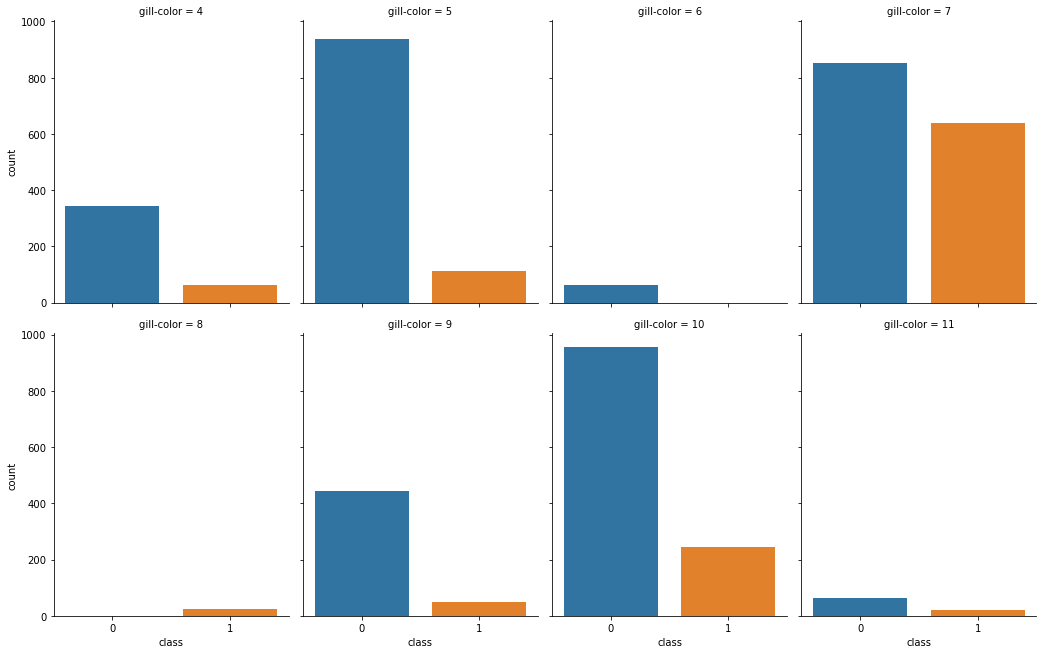

In [21]:
new_var = df[['class' , 'gill-color']]
new_var = new_var[new_var['gill-color']>3.5]
sns.factorplot('class', col = 'gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);

Now preparing data by setting x and y axis and splitting the data into train and test respectively.

In [22]:
X = df.drop(['class'], axis=1)
Y = df["class"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.1)

Now we apply the classification methods one by one to get the accuracy.

1.Decision Tree Classification

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

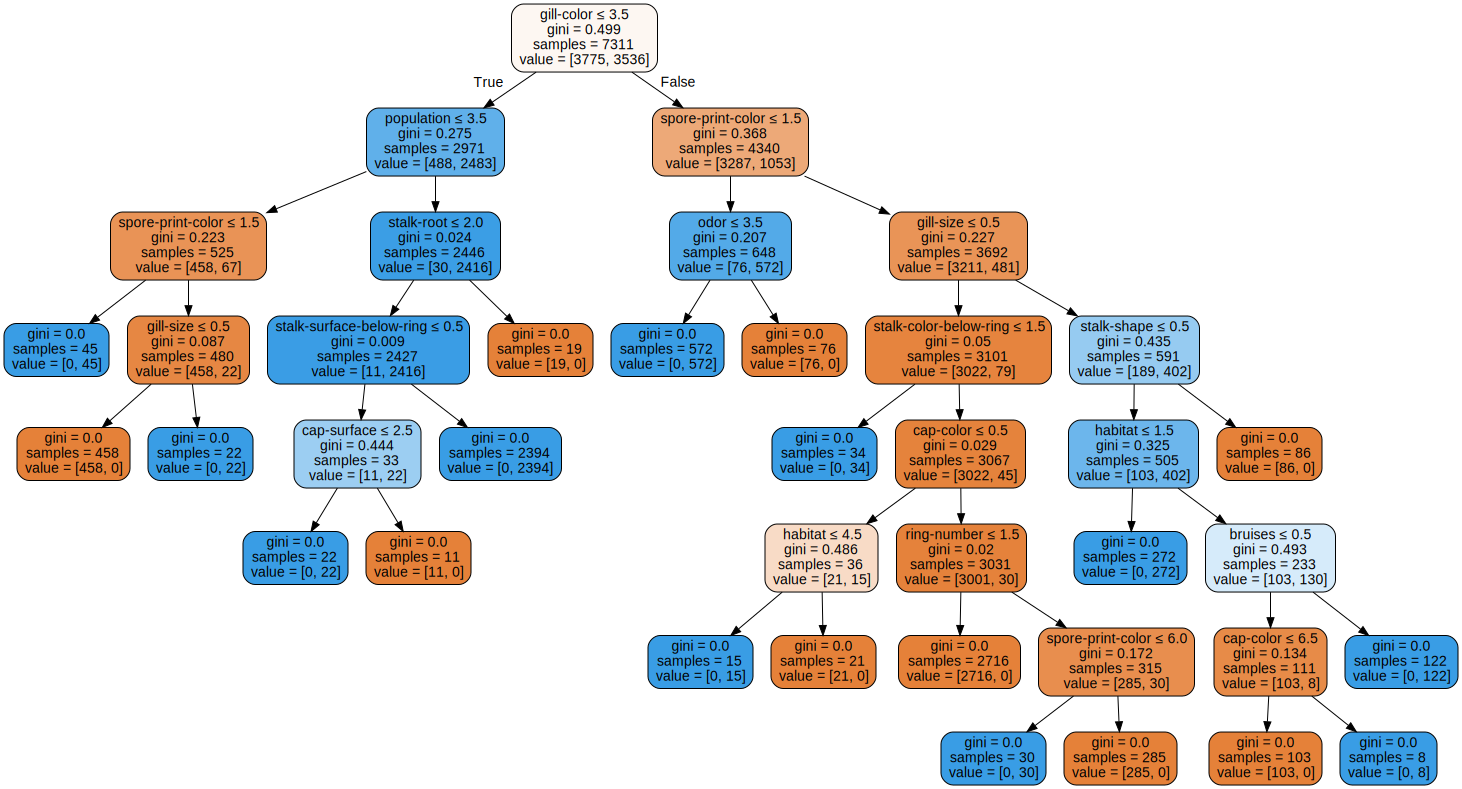

In [24]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz\bin'

dot_data = export_graphviz(dt, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In all the methods examined the most important feature is "gill-color".

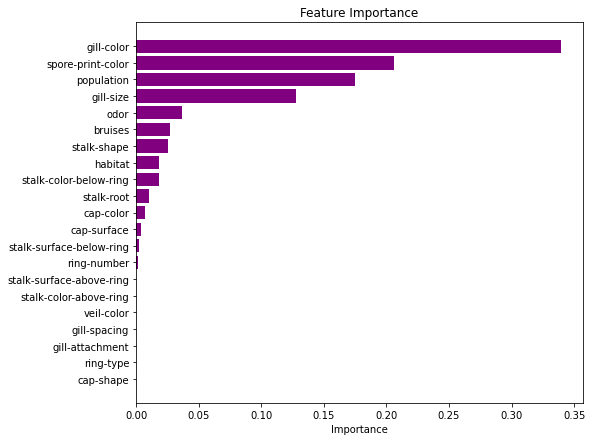

In [25]:
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)),feature_importance[sorted_idx], align='center', color='purple')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.draw()
plt.show()

Now predicting and estimating the actual result.

In [26]:
y_pred_dt = dt.predict(X_test)

In [27]:
print("Desicion Tree Classifier report: \n\n", classification_report(Y_test, y_pred_dt))

Desicion Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [28]:
print("Test Accuracy: {}%".format(round(dt.score(X_test, Y_test)*100,2)))

Test Accuracy: 100.0%


2.Logistics Regression Classification

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', max_iter=500)
lr.fit(X_train, Y_train)

print("Test Accuracy: {}%".format(round(lr.score(X_test, Y_test)*100,2)))

Test Accuracy: 94.96%


In [33]:
Y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(Y_test, Y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.96      0.94      0.95       433
           1       0.94      0.96      0.95       380

    accuracy                           0.95       813
   macro avg       0.95      0.95      0.95       813
weighted avg       0.95      0.95      0.95       813



In [ ]:
3.KNN Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier

best_Kvalue = 0
best_score = 0

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    if knn.score(X_test, Y_test) > best_score:
        best_score = knn.score(X_train, Y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


In [36]:
Y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(Y_test, Y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       433
           1       0.99      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



4.Random Forest Classifiers

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

print("Test Accuracy: {}%".format(round(rf.score(X_test, Y_test)*100, 2)))

Test Accuracy: 100.0%


In [39]:
Y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(Y_test, Y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [40]:
preds = dt.predict(X_test)

print(preds[:36])
print(Y_test[:36].values)

# 0 - Edible
# 1 - Poisonous

[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]
[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]


From the confusion matrix it can be said that the predicted and actual values are 100% accurate.

Conclusion:- So it is concluded that the train and test data is completely balanced.As we can see from above we are getting almost 100% accuracy from all the classification methods.